In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-09-23 16:21:42.057771: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-09-23 16:21:44.160915: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 16:21:44.161942: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-09-23 16:21:44.508098: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-23 16:21:44.510599: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [8]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13563, 512, 512, 1) (13563, 512, 512, 1) (3203, 512, 512, 1) (3203, 512, 512, 1)


In [9]:
X_train, y_train, X_test, y_test = C.Helper.filter_slices(X_train, y_train, X_test, y_test)

(564, 512, 512, 1) (564, 512, 512, 1) (150, 512, 512, 1) (150, 512, 512, 1)


In [10]:
train_gen = C.Helper.augment(X_train, y_train)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [11]:
model = C.Helper.create_unet(X_train[0].shape)

2023-09-23 16:24:15.725892: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-23 16:24:15.728463: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-23 16:24:15.738327: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-09-23 16:24:15.741228: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-23 16:24:15.743680: I tensorflow/core

In [12]:
model, history = C.Helper.train_unet(train_gen, X_train, y_train, X_test, y_test, model, epochs=200)

2023-09-23 16:24:17.059844: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-09-23 16:24:17.080814: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-09-23 16:24:18.298953: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-09-23 16:24:19.114831: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-09-23 16:24:19.770712: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-09-23 16:24:19.770735: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-09-23 16:24:19.770797: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-09-23 16:24:20.803418: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-09-23 16:24:21.663383: I tensorflow/stream_exec

18/18 [==============================] - 159s 6s/step - loss: 0.3255 - iou: 1.3685e-04 - iou_thresholded: 7.4367e-04 - val_loss: 0.0075 - val_iou: 2.4030e-04 - val_iou_thresholded: 9.6070e-04
Epoch 2/200
18/18 [==============================] - 18s 989ms/step - loss: 0.0056 - iou: 3.4843e-04 - iou_thresholded: 7.4245e-04 - val_loss: 0.0022 - val_iou: 3.8918e-04 - val_iou_thresholded: 9.6070e-04
Epoch 3/200
18/18 [==============================] - 18s 982ms/step - loss: 0.0021 - iou: 3.6751e-04 - iou_thresholded: 7.4433e-04 - val_loss: 0.0023 - val_iou: 3.9068e-04 - val_iou_thresholded: 9.6070e-04
Epoch 4/200
18/18 [==============================] - 18s 985ms/step - loss: 0.0018 - iou: 4.0493e-04 - iou_thresholded: 7.4675e-04 - val_loss: 0.0018 - val_iou: 5.5560e-04 - val_iou_thresholded: 9.6070e-04
Epoch 5/200
18/18 [==============================] - 18s 984ms/step - loss: 0.0017 - iou: 5.1708e-04 - iou_thresholded: 7.4044e-04 - val_loss: 0.0015 - val_iou: 7.4503e-04 - val_iou_threshol

18/18 [==============================] - 18s 982ms/step - loss: 3.2095e-04 - iou: 0.3630 - iou_thresholded: 0.4862 - val_loss: 7.5900e-04 - val_iou: 0.1968 - val_iou_thresholded: 0.2635
Epoch 43/200
18/18 [==============================] - 18s 987ms/step - loss: 3.1854e-04 - iou: 0.3686 - iou_thresholded: 0.4915 - val_loss: 7.7158e-04 - val_iou: 0.2033 - val_iou_thresholded: 0.2384
Epoch 44/200
18/18 [==============================] - 18s 984ms/step - loss: 3.3049e-04 - iou: 0.3589 - iou_thresholded: 0.4752 - val_loss: 7.8429e-04 - val_iou: 0.1843 - val_iou_thresholded: 0.2393
Epoch 45/200
18/18 [==============================] - 18s 981ms/step - loss: 3.0500e-04 - iou: 0.3802 - iou_thresholded: 0.5049 - val_loss: 7.4442e-04 - val_iou: 0.2043 - val_iou_thresholded: 0.2961
Epoch 46/200
18/18 [==============================] - 18s 987ms/step - loss: 2.9717e-04 - iou: 0.3871 - iou_thresholded: 0.5185 - val_loss: 8.7906e-04 - val_iou: 0.2034 - val_iou_thresholded: 0.2673
Epoch 47/200
18/18

Epoch 84/200
18/18 [==============================] - 18s 989ms/step - loss: 1.8821e-04 - iou: 0.5383 - iou_thresholded: 0.6480 - val_loss: 0.0020 - val_iou: 0.1971 - val_iou_thresholded: 0.1977
Epoch 85/200
18/18 [==============================] - 18s 982ms/step - loss: 1.8413e-04 - iou: 0.5454 - iou_thresholded: 0.6522 - val_loss: 0.0017 - val_iou: 0.2336 - val_iou_thresholded: 0.2634
Epoch 86/200
18/18 [==============================] - 18s 984ms/step - loss: 1.7034e-04 - iou: 0.5638 - iou_thresholded: 0.6745 - val_loss: 0.0017 - val_iou: 0.2392 - val_iou_thresholded: 0.2574
Epoch 87/200
18/18 [==============================] - 18s 983ms/step - loss: 1.6704e-04 - iou: 0.5717 - iou_thresholded: 0.6763 - val_loss: 0.0017 - val_iou: 0.2459 - val_iou_thresholded: 0.2666
Epoch 88/200
18/18 [==============================] - 18s 982ms/step - loss: 1.6829e-04 - iou: 0.5638 - iou_thresholded: 0.6785 - val_loss: 0.0024 - val_iou: 0.2301 - val_iou_thresholded: 0.2374
Epoch 89/200
18/18 [=====

Epoch 126/200
18/18 [==============================] - 18s 981ms/step - loss: 1.1511e-04 - iou: 0.6689 - iou_thresholded: 0.7635 - val_loss: 0.0027 - val_iou: 0.2578 - val_iou_thresholded: 0.2682
Epoch 127/200
18/18 [==============================] - 18s 982ms/step - loss: 1.1272e-04 - iou: 0.6784 - iou_thresholded: 0.7635 - val_loss: 0.0024 - val_iou: 0.2623 - val_iou_thresholded: 0.2767
Epoch 128/200
18/18 [==============================] - 18s 985ms/step - loss: 1.0877e-04 - iou: 0.6819 - iou_thresholded: 0.7733 - val_loss: 0.0029 - val_iou: 0.2641 - val_iou_thresholded: 0.2756
Epoch 129/200
18/18 [==============================] - 18s 980ms/step - loss: 1.1043e-04 - iou: 0.6795 - iou_thresholded: 0.7666 - val_loss: 0.0030 - val_iou: 0.2522 - val_iou_thresholded: 0.2619
Epoch 130/200
18/18 [==============================] - 18s 986ms/step - loss: 1.0866e-04 - iou: 0.6868 - iou_thresholded: 0.7701 - val_loss: 0.0027 - val_iou: 0.2659 - val_iou_thresholded: 0.2783
Epoch 131/200
18/18 

Epoch 168/200
18/18 [==============================] - 18s 979ms/step - loss: 8.1912e-05 - iou: 0.7465 - iou_thresholded: 0.8166 - val_loss: 0.0033 - val_iou: 0.2696 - val_iou_thresholded: 0.2897
Epoch 169/200
18/18 [==============================] - 18s 985ms/step - loss: 8.1742e-05 - iou: 0.7436 - iou_thresholded: 0.8160 - val_loss: 0.0034 - val_iou: 0.2590 - val_iou_thresholded: 0.2679
Epoch 170/200
18/18 [==============================] - 18s 981ms/step - loss: 7.8752e-05 - iou: 0.7507 - iou_thresholded: 0.8233 - val_loss: 0.0032 - val_iou: 0.2672 - val_iou_thresholded: 0.2798
Epoch 171/200
18/18 [==============================] - 18s 982ms/step - loss: 8.1069e-05 - iou: 0.7482 - iou_thresholded: 0.8214 - val_loss: 0.0041 - val_iou: 0.2369 - val_iou_thresholded: 0.2436
Epoch 172/200
18/18 [==============================] - 18s 985ms/step - loss: 8.1398e-05 - iou: 0.7484 - iou_thresholded: 0.8177 - val_loss: 0.0037 - val_iou: 0.2591 - val_iou_thresholded: 0.2665
Epoch 173/200
18/18 

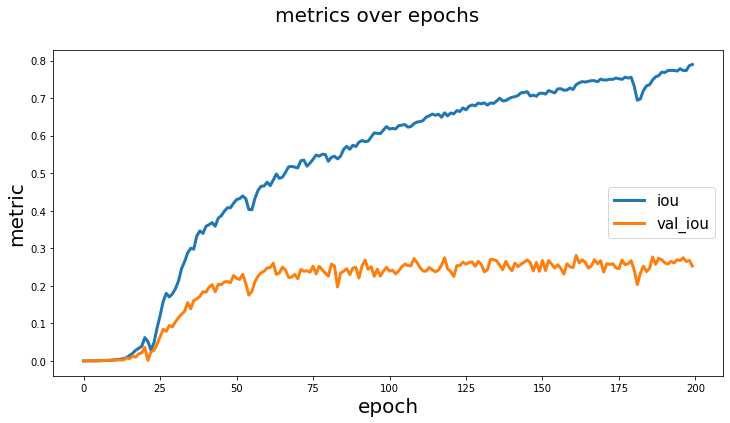

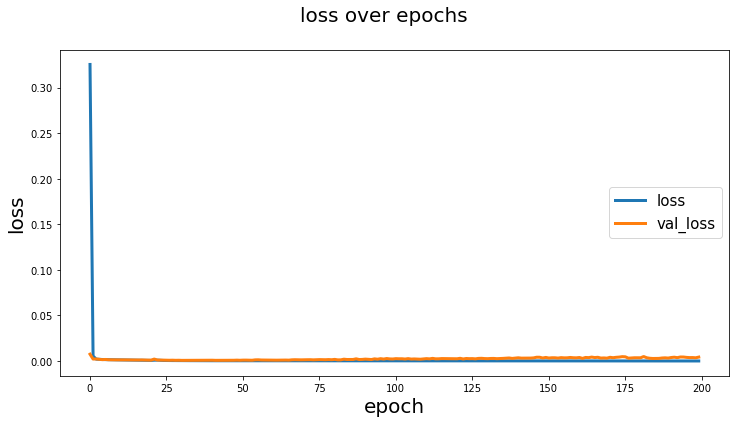

In [13]:
C.Helper.visualize_graph(history)

In [14]:
y_pred = C.Helper.prediction(X_test, model)

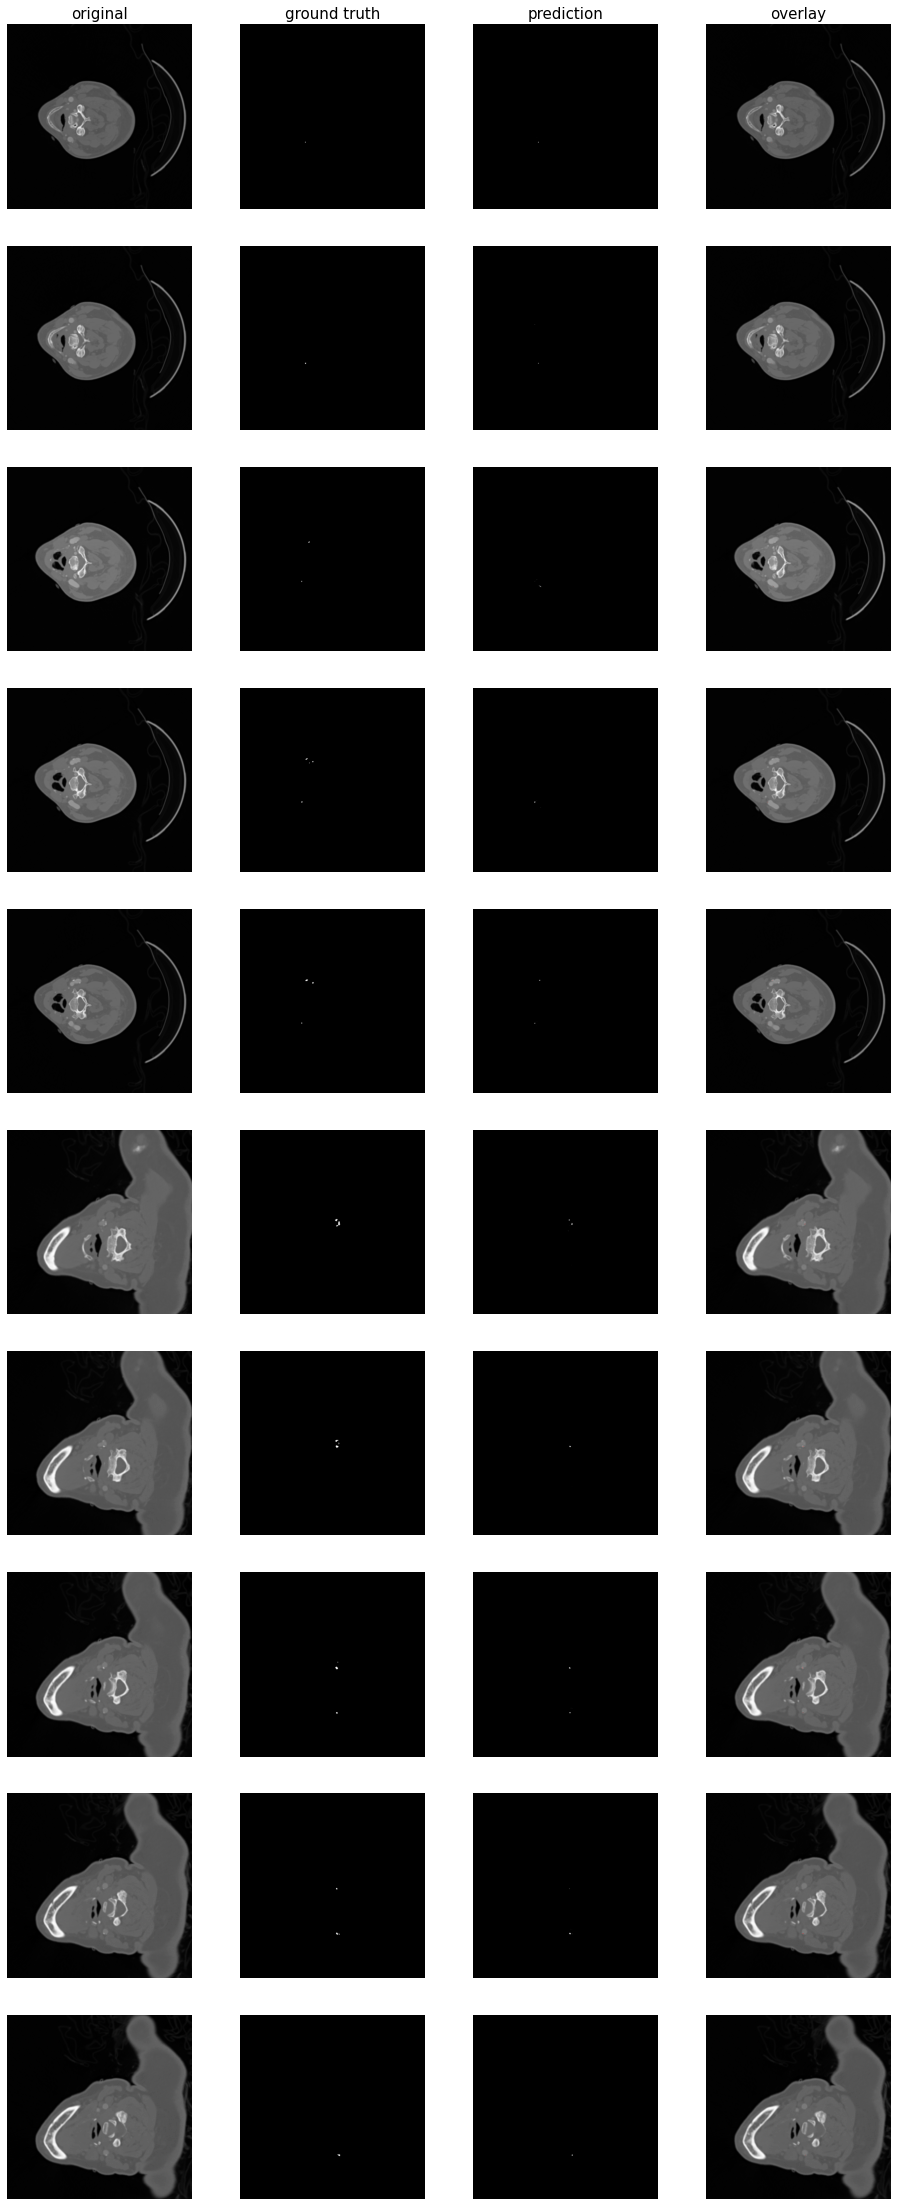

In [15]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [16]:
C.Helper.evaluate(X_test, y_test, model)

5/5 [==============================] - 1s 197ms/step - loss: 0.0043 - iou: 0.2529 - iou_thresholded: 0.2591
